### Task 2

#### Objective: Create a restaurant recommendation system based on user preferences.

#### Steps:

1. Preprocess the dataset by handling missing values and encoding categorical variables.

2. Determine the criteria for restaurant recommendations (e.g., cuisine preference, price range).

3. Implement a content-based filtering approach where users are recommended restaurants similar to their preferred criteria.

4. Test the recommendation system by providing sample user preferences and evaluating the quality of recommendations.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Dataset.csv")

In [3]:
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [4]:
df.shape

(9551, 21)

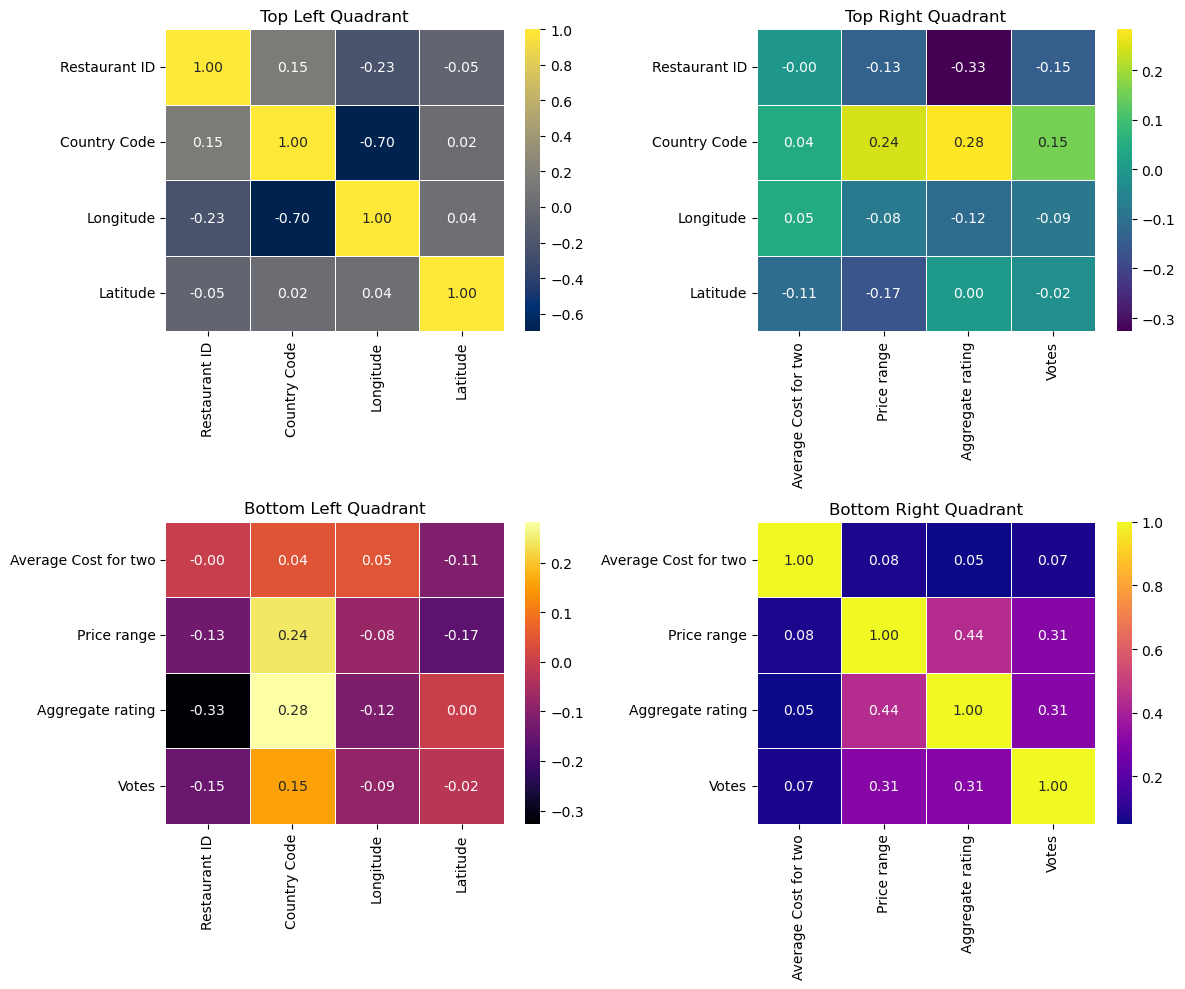

In [5]:
numeric_columns = df.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
sns.heatmap(correlation_matrix.iloc[:len(correlation_matrix)//2, :len(correlation_matrix)//2], annot=True, cmap='cividis', fmt=".2f", linewidths=0.5, ax=ax[0, 0])
ax[0, 0].set_title('Top Left Quadrant')
sns.heatmap(correlation_matrix.iloc[:len(correlation_matrix)//2, len(correlation_matrix)//2:], annot=True, cmap='viridis', fmt=".2f", linewidths=0.5, ax=ax[0, 1])
ax[0, 1].set_title('Top Right Quadrant')
sns.heatmap(correlation_matrix.iloc[len(correlation_matrix)//2:, :len(correlation_matrix)//2], annot=True, cmap='inferno', fmt=".2f", linewidths=0.5, ax=ax[1, 0])
ax[1, 0].set_title('Bottom Left Quadrant')
sns.heatmap(correlation_matrix.iloc[len(correlation_matrix)//2:, len(correlation_matrix)//2:], annot=True, cmap='plasma', fmt=".2f", linewidths=0.5, ax=ax[1, 1])
ax[1, 1].set_title('Bottom Right Quadrant')
plt.tight_layout()
plt.show()

In [6]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [7]:
df.drop('Restaurant ID', axis=1, inplace=True) 
df.drop('Country Code', axis=1, inplace=True) 
df.drop('City', axis=1, inplace=True) 
df.drop('Address', axis=1, inplace=True) 
df.drop('Locality', axis=1, inplace=True) 
df.drop('Locality Verbose', axis=1, inplace=True) 
df.drop('Longitude', axis=1, inplace=True) 
df.drop('Latitude', axis=1, inplace=True) 
df.drop('Currency', axis=1, inplace=True) 
df.drop('Has Table booking', axis=1, inplace=True) 
df.drop('Has Online delivery', axis=1, inplace=True) 
df.drop('Is delivering now', axis=1, inplace=True) 
df.drop('Switch to order menu', axis=1, inplace=True) 
df.drop('Price range', axis=1, inplace=True) 
df.drop('Rating color', axis=1, inplace=True) 
df.drop('Rating text', axis=1, inplace=True)

In [8]:
df.head()

Restaurant Name                          Cuisines  \
0        Le Petit Souffle        French, Japanese, Desserts   
1        Izakaya Kikufuji                          Japanese   
2  Heat - Edsa Shangri-La  Seafood, Asian, Filipino, Indian   
3                    Ooma                   Japanese, Sushi   
4             Sambo Kojin                  Japanese, Korean   

   Average Cost for two  Aggregate rating  Votes  
0                  1100               4.8    314  
1                  1200               4.5    591  
2                  4000               4.4    270  
3                  1500               4.9    365  
4                  1500               4.8    229

In [9]:
df.isnull().sum()

Restaurant Name         0
Cuisines                9
Average Cost for two    0
Aggregate rating        0
Votes                   0
dtype: int64

In [10]:
df.dropna(subset=['Cuisines'], inplace=True)
df.dropna(inplace=True)
df.isnull().sum()

Restaurant Name         0
Cuisines                0
Average Cost for two    0
Aggregate rating        0
Votes                   0
dtype: int64

In [11]:
for column in df.columns:
    distinct_values = df[column].unique()
    print(f"Distinct values for column '{column}':")
    print(distinct_values)
    print("-" * 100)

Distinct values for column 'Restaurant Name':
['Le Petit Souffle' 'Izakaya Kikufuji' 'Heat - Edsa Shangri-La' ...
 'Huqqa' 'A���k Kahve' "Walter's Coffee Roastery"]
----------------------------------------------------------------------------------------------------
Distinct values for column 'Cuisines':
['French, Japanese, Desserts' 'Japanese'
 'Seafood, Asian, Filipino, Indian' ... 'Burger, Izgara'
 'World Cuisine, Patisserie, Cafe' 'Italian, World Cuisine']
----------------------------------------------------------------------------------------------------
Distinct values for column 'Average Cost for two':
[  1100   1200   4000   1500   1000   2000   6000    800    900    700
    850    600   3000   1800     55     30     45     60     50     80
     90    200    150    100    230    240    350    140    170    120
    250     40     70    300     85     75    400     65     25     10
      0     20     35      7    270    500    430    315    220     95
    190    260    180    330 

In [12]:
missing_values = df.isna().sum() 
missing_values_column = df['Restaurant Name'].isna().sum() 
missing_values_column = df['Cuisines'].isna().sum() 
missing_values_column = df['Average Cost for two'].isna().sum()
missing_values_column = df['Aggregate rating'].isna().sum()
missing_values_column = df['Votes'].isna().sum()

In [13]:
df_cleaned = df.dropna() 
df_cleaned = df.dropna(subset=['Restaurant Name']) 
df_cleaned = df.dropna(subset=['Cuisines']) 
df_cleaned = df.dropna(subset=['Average Cost for two'])
df_cleaned = df.dropna(subset=['Aggregate rating'])
df_cleaned = df.dropna(subset=['Votes'])

In [14]:
df.describe(include="all")

Restaurant Name      Cuisines  Average Cost for two  Aggregate rating  \
count              9542          9542           9542.000000       9542.000000   
unique             7437          1825                   NaN               NaN   
top     Cafe Coffee Day  North Indian                   NaN               NaN   
freq                 83           936                   NaN               NaN   
mean                NaN           NaN           1200.326137          2.665238   
std                 NaN           NaN          16128.743876          1.516588   
min                 NaN           NaN              0.000000          0.000000   
25%                 NaN           NaN            250.000000          2.500000   
50%                 NaN           NaN            400.000000          3.200000   
75%                 NaN           NaN            700.000000          3.700000   
max                 NaN           NaN         800000.000000          4.900000   

               Votes  
count    9542.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean      156.772060  
std       430.203324  
min         0.000000  
25%         5.000000  
50%        31.000000  
75%       130.000000  
max     10934.000000

In [15]:
df.head()

Restaurant Name                          Cuisines  \
0        Le Petit Souffle        French, Japanese, Desserts   
1        Izakaya Kikufuji                          Japanese   
2  Heat - Edsa Shangri-La  Seafood, Asian, Filipino, Indian   
3                    Ooma                   Japanese, Sushi   
4             Sambo Kojin                  Japanese, Korean   

   Average Cost for two  Aggregate rating  Votes  
0                  1100               4.8    314  
1                  1200               4.5    591  
2                  4000               4.4    270  
3                  1500               4.9    365  
4                  1500               4.8    229

In [16]:
def get_recommendations(cuisine, rating):
    # Filter the dataframe for the given cuisine and rating
    recommendations = df[(df['Cuisines'].str.contains(cuisine)) & (df['Aggregate rating'] > rating)]
    
    # Sort the recommendations in descending order of rating
    recommendations = recommendations.sort_values('Aggregate rating', ascending=False)
    
    # Return the top 10 recommendations
    return recommendations.head(10)

In [17]:
# Test the recommendation system
cuisine = 'French'
rating = 3.5
recommendations = get_recommendations(cuisine, rating)
print(recommendations)

                     Restaurant Name                      Cuisines  \
9484  Restaurant Mosaic @ The Orient                        French   
0                   Le Petit Souffle    French, Japanese, Desserts   
9384        Restaurant Gordon Ramsay                        French   
1145                        La Plage               Seafood, French   
67                   Les 3 Brasseurs  French, Brazilian, Beverages   
1141                    Baba Au Rhum         Italian, French, Cafe   
9361                     The Kitchin               British, French   
9329     Hippopotamus - Museum Hotel                  French, Kiwi   
9294     Avec Moi Restaurant and Bar               French, Western   
259                           Django                        French   

      Average Cost for two  Aggregate rating  Votes  
9484                  3210               4.9     85  
0                     1100               4.8    314  
9384                   230               4.7    320  
1145         

In [18]:
def get_recommendations(cuisines, min_rating):
    # Split the input cuisines into a list
    cuisines = cuisines.split(',')
    
    # Create a mask for each cuisine
    masks = [df['Cuisines'].str.contains(cuisine) for cuisine in cuisines]
    
    # Combine the masks
    final_mask = masks[0]
    for mask in masks[1:]:
        final_mask = final_mask | mask
    
    # Filter the dataframe for the given cuisines and rating
    recommendations = df[final_mask & (df['Aggregate rating'] > min_rating)]
    
    # Sort the recommendations in descending order of rating and votes
    recommendations = recommendations.sort_values(['Aggregate rating', 'Votes'], ascending=[False, False])
    
    # Return the top recommendations with selected columns
    return recommendations[['Restaurant Name', 'Aggregate rating','Votes', 'Cuisines', 'Average Cost for two']]

# Prompt user for input
cuisines = input("Enter your preferred cuisine(s) separated by commas: ")
min_rating = float(input("Enter your minimum preferred aggregate rating: "))

# Test the recommendation system
recommendations = get_recommendations(cuisines, min_rating)
print(recommendations)

Enter your preferred cuisine(s) separated by commas: Japanese,French
Enter your minimum preferred aggregate rating: 4.5
                     Restaurant Name  Aggregate rating  Votes  \
9287                      Sushi Masa               4.9    605   
429                    Marukame Udon               4.9    602   
3                               Ooma               4.9    365   
9484  Restaurant Mosaic @ The Orient               4.9     85   
260                         Miyabi 9               4.8    860   
0                   Le Petit Souffle               4.8    314   
4                        Sambo Kojin               4.8    229   
20                    NIU by Vikings               4.7    535   
9384        Restaurant Gordon Ramsay               4.7    320   
7067                        Pa Pa Ya               4.7    268   
9383                            Roka               4.6    436   
9396                    Bone Daddies               4.6    418   
1145                        La Plag